# Milestone Project 1: Food Vision Big

## Get helper functions
In the past modeules, we've created a bunch of helper functions to do small tasks required for our notebooks.

Rather than rewrite all of these, we can import a script and load them in from there.

In [1]:
import sys
from contextlib import contextmanager

# Define a context manager to temporarily add a path to sys.path
@contextmanager
def temporary_sys_path_append(path):
    sys.path.append(path)  # Add the specified path to sys.path
    try:
        yield  # Allow code within the with-block to execute
    finally:
        # Ensure the path is removed after exiting the with-block
        sys.path.remove(path)

# Using the context manager to temporarily add a path to sys.path
with temporary_sys_path_append('..'):
    # Inside this block, you can import modules located in the added path
    from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys
    # Use the function or perform actions with the imported module here

# Outside the with-block, the path is no longer in sys.path, limiting the change to the block

2024-03-05 16:54:43.521057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 16:54:43.521124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 16:54:43.641557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 16:54:43.877681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 16:54:45.518487: W tensorflow/compiler/tf2

## Use TensorFlow Datasets to Download Data

In [2]:
# Get Tensorflow Datasets
import tensorflow_datasets as tdfs

In [3]:
# List all available datasets
datasets_list = tdfs.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list)

2024-03-05 16:55:11.732065: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


True


In [4]:
# Load in the data
(train_data, test_data), ds_info = tdfs.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True, # data gets returned in tuple format (data, label)
                                             with_info=True)

2024-03-05 16:55:14.593216: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:29:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 16:55:14.941731: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:29:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 16:55:14.941786: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:29:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 16:55:14.944961: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:29:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 16:55:14.945039: I external/local_xla/xla/stream_executor

## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they albel encoded)
* Do the labels match up with class names?

In [5]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [6]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [7]:
# Take one sample of the train data
train_one_sample = train_data.take(1) 
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [8]:
# Output info about our training sample
for image, label in train_one_sample:
    print(f"""
    Image shape: {image.shape}
    Image datatype: {image.dtype}
    Target class from Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shape: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target class from Food101 (tensor form): 1
    Class name (str form): baby_back_ribs
    


In [9]:
# What does our image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 95,  95,  25],
        [ 87,  87,  17],
        [ 96,  93,  26],
        ...,
        [178, 189, 191],
        [180, 191, 193],
        [178, 189, 191]],

       [[ 92,  92,  22],
        [ 86,  86,  16],
        [ 91,  88,  21],
        ...,
        [183, 194, 196],
        [184, 195, 197],
        [180, 191, 193]],

       [[ 97,  94,  25],
        [ 92,  89,  20],
        [ 89,  86,  19],
        ...,
        [187, 198, 200],
        [185, 199, 200],
        [181, 195, 196]],

       ...,

       [[205, 196, 155],
        [205, 196, 155],
        [203, 194, 155],
        ...,
        [216, 228, 226],
        [214, 226, 224],
        [207, 219, 217]],

       [[209, 197, 155],
        [210, 198, 156],
        [207, 198, 159],
        ...,
        [216, 228, 226],
        [212, 224, 222],
        [212, 224, 222]],

       [[202, 191, 146],
        [207, 195, 153],
        [207, 198, 157],
        ...,
        [217, 229, 22

In [10]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow Datasets

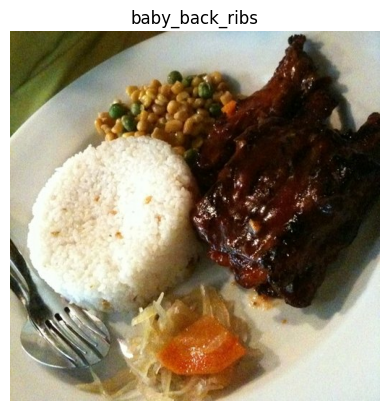

In [11]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image.numpy())
plt.title(class_names[label.numpy()])
plt.axis("off")
plt.show()

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc).

However, not all data (including data from TensorFlow Datasets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all diferent sized tensors (different sized images)
* Not sclaed (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalized tensors generally perform better

With these points in mind, we've got a few things we can tackle with a preprocessing function.

Since we're going to be using an EfficientNetBX pretrained model from `tf.keras.applications` we don't need to resclae our data (these architectures have rescaling built-in).

This means our functions needs to: 
1. Reshape our images to all the same size
2. Convert the dtype of our images tensors from `unit8` to `float32`

In [12]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image dtype from 'unit8' -> 'float32' and reshapes
    image to [img_shape, img_shape, colour_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape target image
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

## Batch & prepare datasets

In [13]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [14]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data abd turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img).batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Creating modelling callbakcs

We're going to create a couple of callb acks to help us while our model trains:
* TensorBoard callback to log training results (so we can visualize them later if need be)
* ModelCheckpoint callback to save our model's progress after feature extraction.

In [16]:
# Create ModelChekpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

## Setup mixed precision training

Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance.

In [17]:
# Turn on mixed precision training 
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060 Ti, compute capability 8.6


2024-03-05 16:55:41.306083: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:29:00.0/numa_node
Your kernel may have been built without NUMA support.
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060 Ti, compute capability 8.6


In [18]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model

In [19]:
from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

## Cheking layer dtype policies

In [21]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


## Fit the feature extraction model

If our goal is to fine-tune a pretrained model, the general order of doing things is:
1. Build a feature extraction model (train a couple putput layers with base layers frozen)
2. Fine-tune some of the frozen layers

In [22]:
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20240305-165556


2024-03-05 16:55:56.903971: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Epoch 1/3


2024-03-05 16:56:02.894811: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-05 16:56:03.452064: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-05 16:56:04.565193: I external/local_xla/xla/service/service.cc:168] XLA service 0x56012cb12410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-05 16:56:04.565232: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-03-05 16:56:04.587964: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709668564.726137     998 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2368/2368 [==============================] - 141s 56ms/step - loss: 1.7186 - accuracy: 0.5820 - val_loss: 1.1325 - val_accuracy: 0.6944
Epoch 2/3
2368/2368 [==============================] - 136s 57ms/step - loss: 1.1997 - accuracy: 0.6887 - val_loss: 1.0250 - val_accuracy: 0.7240
Epoch 3/3
2368/2368 [==============================] - 147s 62ms/step - loss: 1.0547 - accuracy: 0.7242 - val_loss: 0.9925 - val_accuracy: 0.7219


In [23]:
# Evalute model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 34s 42ms/step - loss: 0.9976 - accuracy: 0.7286


[0.9975708723068237, 0.7286336421966553]

## Challenge

Make the TODO list: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/TEMPLATE_07_food_vision_milestone_project_1.ipynb

### Save the model

In [28]:
# Save model locally
model.save("modelo")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3a0b0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3a0b0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3b5b0>, 139753094834736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3b5b0>, 139753094834736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accaa71f0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accaa71f0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accac4430>, 139753094834736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accac4430>, 139753094834736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3a0b0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3a0b0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3b5b0>, 139753094834736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accf3b5b0>, 139753094834736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accaa71f0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280, 101), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accaa71f0>, 139753094352048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accac4430>, 139753094834736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(101,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1accac4430>, 139753094834736), {}).


INFO:tensorflow:Assets written to: modelo/assets


INFO:tensorflow:Assets written to: modelo/assets


In [29]:
# Load model previously saved above
model_loaded = tf.keras.models.load_model("modelo")

In [30]:
# Check the layers in the base model and see what dtype policy they're using
for layer in model_loaded.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [31]:
# Check loaded model performance
results_loaded_model = model_loaded.evaluate(test_data)
results_loaded_model

790/790 [==============================] - 41s 49ms/step - loss: 0.9957 - accuracy: 0.7276


[0.9956735968589783, 0.7276039719581604]

### Preparing our model's layers for fine-tuning

In [24]:
# Set all of the layers .trainable in model to True 
model.trainable = True

In [33]:
# Check to see what dtype_policy of the layers in your model are
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [25]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
# Monitor the val_loss and stop training if it doesn't improve for 3 epochs
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Create ModelCheckpoint callback to save best model during fine-tuning
# Save the best model only
# Monitor val_loss while training and save the best model (lowest val_loss)
checkpoint_path = "model_checkpoints/cp.ckpt"
model_fine_tuning_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                                  monitor="val_loss",
                                                                  mode="min",  
                                                                  save_best_only=True,
                                                                  save_weights_only=True,
                                                                  verbose=0)

In [26]:
# Compile the model ready for fine-tuning
# Use the Adam optimizer with a 10x lower than default learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
# Start to fine-tune (all layers)
# Use 100 epochs as the default
# Validate on 15% of the test_data
# Use the create_tensorboard_callback, ModelCheckpoint and EarlyStopping callbacks you created eaelier

fine_tune_epochs = 100

history_fine_tune_model = model.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=int(0.15 * len(test_data)),
                                    initial_epoch=history_101_food_classes_feature_extract.epoch[-1],
                                    callbacks=[early_stopping_callback,
                                               model_fine_tuning_checkpoint,
                                               create_tensorboard_callback("training_logs",
                                                                           "efficientnetb0_101_classes_all_data_fine_tune")])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_fine_tune/20240305-170717
Epoch 3/100
2368/2368 [==============================] - 439s 183ms/step - loss: 0.8702 - accuracy: 0.7650 - val_loss: 0.7559 - val_accuracy: 0.7871
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.5375 - accuracy: 0.8519

2024-03-05 17:21:49.650744: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


2368/2368 [==============================] - 436s 184ms/step - loss: 0.5375 - accuracy: 0.8519 - val_loss: 0.7761 - val_accuracy: 0.7865
Epoch 5/100
2368/2368 [==============================] - 432s 181ms/step - loss: 0.3043 - accuracy: 0.9130 - val_loss: 0.8209 - val_accuracy: 0.7950
Epoch 6/100
2368/2368 [==============================] - 441s 186ms/step - loss: 0.1600 - accuracy: 0.9525 - val_loss: 0.9130 - val_accuracy: 0.7908


In [32]:
results_fine_tune = model.evaluate(test_data)
results_fine_tune

790/790 [==============================] - 38s 45ms/step - loss: 0.9447 - accuracy: 0.7847


[0.9447191953659058, 0.784673273563385]